In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
dataset=load_diabetes()

In [4]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [6]:
df_diabetes=pd.DataFrame(dataset.data,columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

In [7]:
X=df_diabetes
y=dataset['target']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
225,0.030811,0.050680,0.032595,0.049415,-0.040096,-0.043589,-0.069172,0.034309,0.063015,0.003064
412,0.074401,-0.044642,0.085408,0.063187,0.014942,0.013091,0.015505,-0.002592,0.006207,0.085907
118,-0.056370,0.050680,-0.010517,0.025315,0.023198,0.040022,-0.039719,0.034309,0.020609,0.056912
114,0.023546,-0.044642,0.110198,0.063187,0.013567,-0.032942,-0.024993,0.020655,0.099241,0.023775
364,0.001751,0.050680,-0.006206,-0.019442,-0.009825,0.004949,-0.039719,0.034309,0.014821,0.098333


In [10]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.136522,0.181976,0.308406,0.261534,0.200301,-0.023100,0.165340,0.270981,0.262201
sex,0.136522,1.000000,0.044746,0.165128,0.033717,0.128023,-0.344052,0.320619,0.121299,0.159936
bmi,0.181976,0.044746,1.000000,0.384534,0.246802,0.255519,-0.372335,0.431946,0.448657,0.394699
bp,0.308406,0.165128,0.384534,1.000000,0.242052,0.164355,-0.113747,0.209316,0.362476,0.376421
s1,0.261534,0.033717,0.246802,0.242052,1.000000,0.891476,0.044128,0.556987,0.528922,0.323666
s2,0.200301,0.128023,0.255519,0.164355,0.891476,1.000000,-0.190767,0.653120,0.307541,0.298647
s3,-0.023100,-0.344052,-0.372335,-0.113747,0.044128,-0.190767,1.000000,-0.732862,-0.388778,-0.304091
s4,0.165340,0.320619,0.431946,0.209316,0.556987,0.653120,-0.732862,1.000000,0.629707,0.441489
s5,0.270981,0.121299,0.448657,0.362476,0.528922,0.307541,-0.388778,0.629707,1.000000,0.464878
s6,0.262201,0.159936,0.394699,0.376421,0.323666,0.298647,-0.304091,0.441489,0.464878,1.000000


<Axes: >

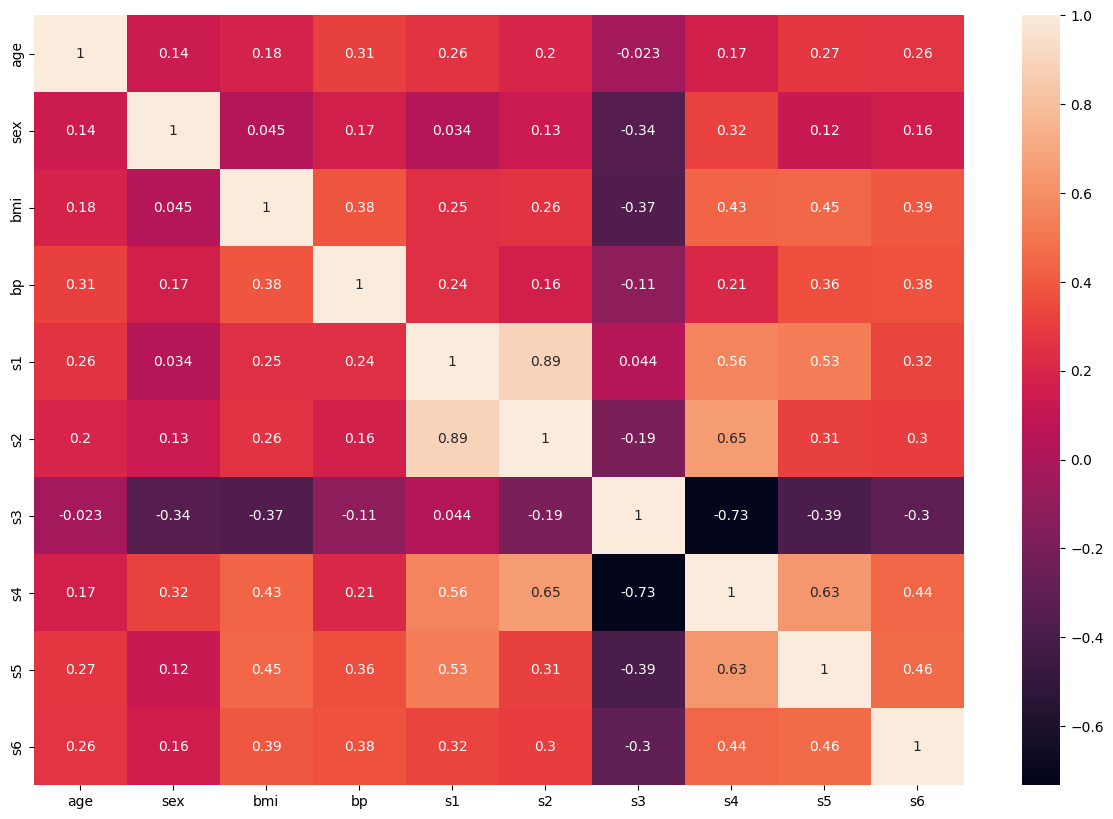

In [11]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

Hyperarameter Tuning

In [13]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
regressor=DecisionTreeRegressor()
grid=GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [16]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [17]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [18]:
y_pred=grid.predict(X_test)

In [19]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.3494216021967319
47.91253522704861
3512.022414576687


In [20]:
selectedmodel=DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='sqrt',splitter='best')
selectedmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='sqrt')

[Text(0.5, 0.9, 'x[2] <= 0.005\nfriedman_mse = 6148.282\nsamples = 309\nvalue = 153.903'),
 Text(0.25, 0.7, 'x[7] <= 0.031\nfriedman_mse = 3636.316\nsamples = 183\nvalue = 118.355'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[3] <= -0.014\nfriedman_mse = 2752.467\nsamples = 143\nvalue = 105.315'),
 Text(0.0625, 0.3, 'x[4] <= -0.039\nfriedman_mse = 1887.167\nsamples = 76\nvalue = 92.566'),
 Text(0.03125, 0.1, 'friedman_mse = 2202.956\nsamples = 34\nvalue = 107.5'),
 Text(0.09375, 0.1, 'friedman_mse = 1304.821\nsamples = 42\nvalue = 80.476'),
 Text(0.1875, 0.3, 'x[8] <= 0.027\nfriedman_mse = 3340.502\nsamples = 67\nvalue = 119.776'),
 Text(0.15625, 0.1, 'friedman_mse = 3091.586\nsamples = 59\nvalue = 111.203'),
 Text(0.21875, 0.1, 'friedman_mse = 637.0\nsamples = 8\nvalue = 183.0'),
 Text(0.375, 0.5, 'x[3] <= -0.025\nfriedman_mse = 4014.724\nsamples = 40\nvalue = 164.975'),
 Text(0.3125, 0.3, 'x[9] <= -0.009\nfriedman_mse = 1325.479\nsamples = 13\nvalue = 125.462'),
 Text(0.28125,

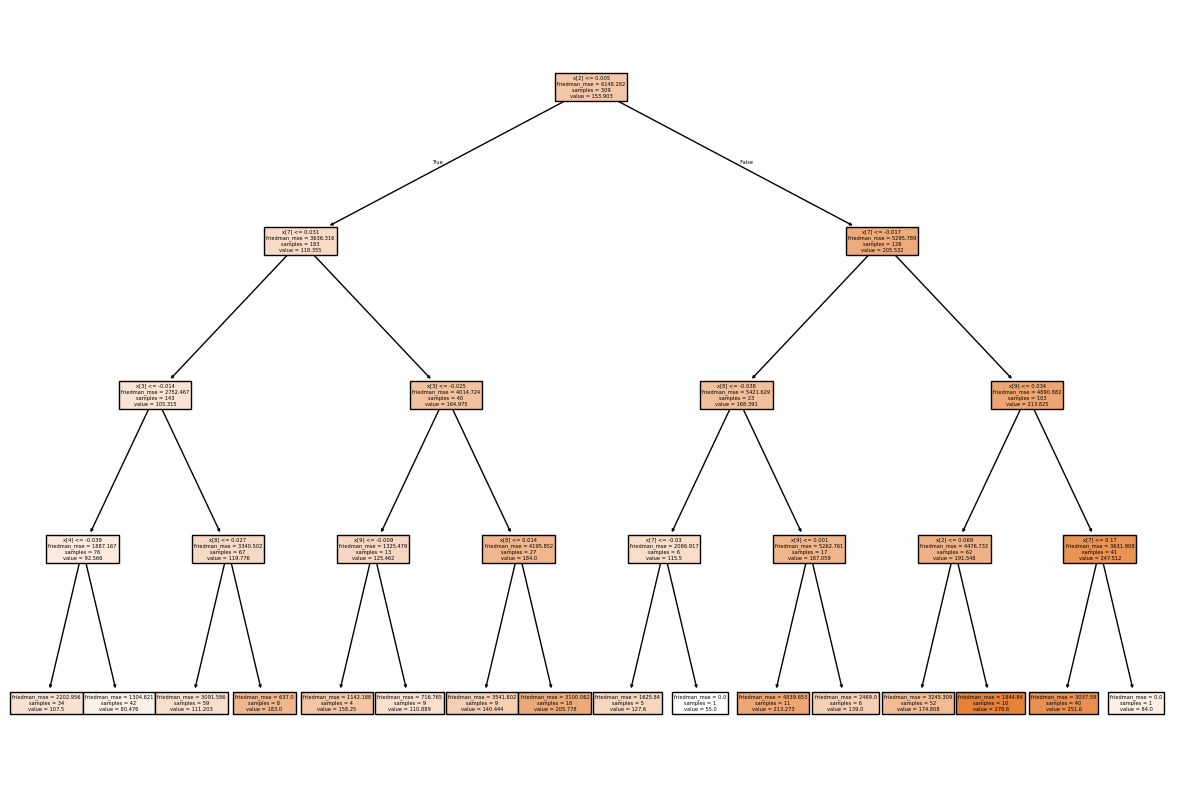

In [21]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel,filled=True)